In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
from src.rentorbuy import RentOrBuy
from src.asset import annual_to_monthly_stdev, annual_to_monthly_return

### Insert variables
- `monthly_rent`: the monthly rent of an apartment similar to the one you want to buy.
- `house_price`: the price which you expect to pay for the house, i.e. listed price + overbid.
- `additional_monthly_costs`: any additional costs of ownership, e.g. condo fees.
- `additional_purchase_costs`: They include legal fees, title insurance, home inspection, home appraisal, etc.
- `down_payment`: the downpayment you expect to put on your mortgage.
- `mortgage_apr`: the interest on your mortgage in percentage, e.g. $5\%$ (including fees). The interest is assumed to be fixed for the whole loan term.
- `mortgage_amortization_years`: the years that will take you to repay the mortgage.
- `mortgage_additional_payments`: the monthly additional amount that you intend to use to repay your mortgage.
- `maintenance_cost`: the yearly maintenance costs as a percentage of the `house_price`.
- `monthly_property_tax_rate`: the monthly property tax on your house (annual property tax divided by 12).
- `annual_inflation`: the expected avg. annual rate of inflation over the term of the loan.
- `return_ret`: the expected avg. annual return of real estate investements in the area where you are planning to buy over the `mortgage_term`.

- `housing_asset_dict`: distribution of expected monthly returns on real estate (e.g. based on historical data).
- `investment_asset_dict`: distribution of expected monthly returns on alternative investment to real estate (e.g. low cost index fund).

### TODO
- Take into account tax discount on mortgage interest and purchase costs
- Take into account costs of selling the house
- Improve visualization

In [2]:
mgt = RentOrBuy(
    monthly_rent=2000,
    house_price=565000,
    woz_value=550000,
    eigenwoningforfait=0.0045, 
    down_payment=0,
    mortgage_amortization_years=30,
    mortgage_apr=0.045,
    additional_purchase_costs=20000,
    additional_monthly_costs=300,
    mortgage_additional_payments=0,
    annual_inflation=0.02,
    monthly_property_tax_rate=0.000042,
    maintenance_cost=0.01,
    housing_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.0735), 
            "scale":  annual_to_monthly_stdev(0.0860)}
    },
    investment_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.1195), 
            "scale":  annual_to_monthly_stdev(0.198)}
    },
    number_of_simulations=10000,

)

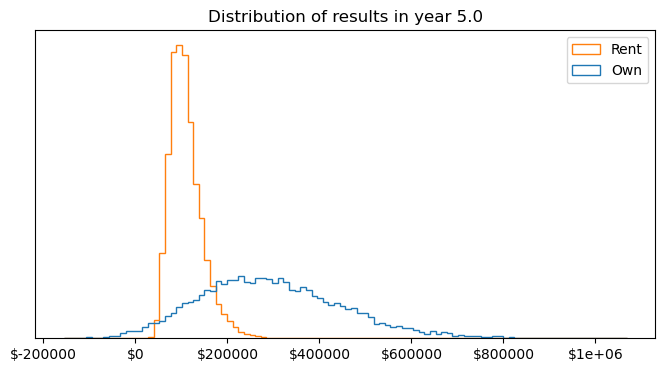

In [3]:
mgt.histogram(period=60)

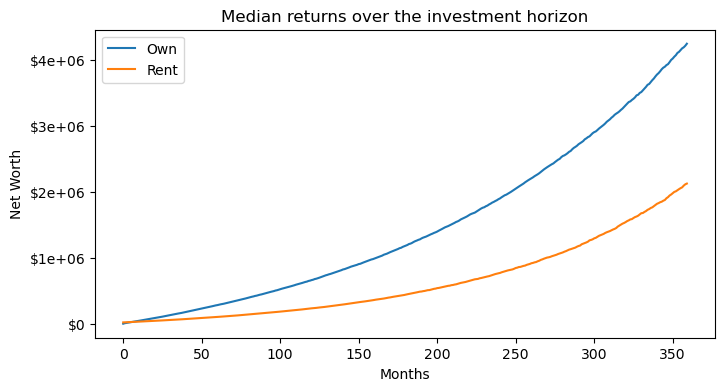

In [4]:
mgt.median_returns_plot()

In [5]:
mgt.mortgage_df

,Begin_balance,Payment,Principal,Interest,Additional_payment,End_balance,total_payment,Tax deduction,Net interest
Date,,,,,,,,,
2022-11-01,565000.0,2863.0,744.0,2119.0,0,564256.0,2154.0,-709.0,1410.0
2022-12-01,564256.0,2863.0,747.0,2116.0,0,563509.0,2155.0,-708.0,1408.0
2023-01-01,563509.0,2863.0,750.0,2113.0,0,562759.0,2157.0,-706.0,1407.0
2023-02-01,562759.0,2863.0,753.0,2110.0,0,562006.0,2158.0,-705.0,1405.0
2023-03-01,562006.0,2863.0,755.0,2108.0,0,561251.0,2159.0,-704.0,1404.0
...,...,...,...,...,...,...,...,...,...
2052-06-01,13996.0,2863.0,2811.0,52.0,0,11185.0,2981.0,118.0,170.0
2052-07-01,11185.0,2863.0,2821.0,42.0,0,8364.0,2985.0,122.0,164.0
2052-08-01,8364.0,2863.0,2832.0,31.0,0,5532.0,2990.0,127.0,158.0
